<a href="https://colab.research.google.com/github/ALMerrill/cs474_labs_f2019/blob/master/DL_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6: Sequence-to-sequence models

## Description:
For this lab, you will code up the [char-rnn model of Karpathy](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). This is a recurrent neural network that is trained probabilistically on sequences of characters, and that can then be used to sample new sequences that are like the original.

This lab will help you develop several new skills, as well as understand some best practices needed for building large models. In addition, we'll be able to create networks that generate neat text!

## There are two parts of this lab:
###  1.   Wiring up a basic sequence-to-sequence computation graph
###  2.   Implementing your own GRU cell.


An example of my final samples are shown below (more detail in the
final section of this writeup), after 150 passes through the data.
Please generate about 15 samples for each dataset.

<code>
And ifte thin forgision forward thene over up to a fear not your
And freitions, which is great God. Behold these are the loss sub
And ache with the Lord hath bloes, which was done to the holy Gr
And appeicis arm vinimonahites strong in name, to doth piseling 
And miniquithers these words, he commanded order not; neither sa
And min for many would happine even to the earth, to said unto m
And mie first be traditions? Behold, you, because it was a sound
And from tike ended the Lamanites had administered, and I say bi
</code>


---

## Part 0: Readings, data loading, and high level training

---

There is a tutorial here that will help build out scaffolding code, and get an understanding of using sequences in pytorch.

* Read the following

> * [Pytorch sequence-to-sequence tutorial](https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html)
* [Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)






In [3]:
! wget -O ./text_files.tar.gz 'https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlifkda6h0x5bk%2Fhzosotq4zil49m%2Fjn13x09arfeb%2Ftext_files.tar.gz' 
! tar -xzf text_files.tar.gz
! pip install unidecode
! pip install torch
import torch

def char_tensor(string):
  tensor = torch.zeros(len(string)).long()
  for c in range(len(string)):
      tensor[c] = all_characters.index(string[c])
  return tensor


--2019-10-19 03:07:54--  https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlifkda6h0x5bk%2Fhzosotq4zil49m%2Fjn13x09arfeb%2Ftext_files.tar.gz
Resolving piazza.com (piazza.com)... 34.205.95.128, 52.45.119.166, 52.2.48.133, ...
Connecting to piazza.com (piazza.com)|34.205.95.128|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://d1b10bmlvqabco.cloudfront.net/attach/jlifkda6h0x5bk/hzosotq4zil49m/jn13x09arfeb/text_files.tar.gz [following]
--2019-10-19 03:07:55--  https://d1b10bmlvqabco.cloudfront.net/attach/jlifkda6h0x5bk/hzosotq4zil49m/jn13x09arfeb/text_files.tar.gz
Resolving d1b10bmlvqabco.cloudfront.net (d1b10bmlvqabco.cloudfront.net)... 143.204.165.139, 143.204.165.65, 143.204.165.91, ...
Connecting to d1b10bmlvqabco.cloudfront.net (d1b10bmlvqabco.cloudfront.net)|143.204.165.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1533290 (1.5M) [application/x-gzip]
Saving to: ‘./text_files.tar.gz’

./text_files.tar.g

In [0]:
# input_size = dimmension of vocab
# hidden_size = dimmension of embedding (hyperparameter)
# makes a lookup table where each row is a vector of length embedding for a character in the vocab
  # these values are trained
  # takes in a character like 'a' and returns the current embedding for that character.
  # that embedding becomes the input to the network

import unidecode
import string
import random
import re
import pdb
from torch.utils.data import Dataset, DataLoader

all_characters = string.printable
n_characters = len(all_characters)


class TextDataset(Dataset):
  def __init__(self, chunk_len=200, file_name='./text_files/lotr.txt'):
    self.chunk_len = chunk_len
    self.file = unidecode.unidecode(open(file_name).read())
    self.file = self.file.replace('\n',' ')
    self.len = len(self.file)
  
  def __getitem__(self):
    pass
  
  def __len__(self):
    return self.len
  
  def random_training_set(self):    
    chunk = self.random_chunk(self.chunk_len)
    inp = char_tensor(chunk[:-1])
    target = char_tensor(chunk[1:])
    return inp, target
  
  def random_chunk(self, chunk_len):
    start_index = random.randint(0, self.len - chunk_len)
    end_index = start_index + chunk_len + 1
    return self.file[start_index:end_index]
  



---

## Part 4: Creating your own GRU cell 

**(Come back to this later - its defined here so that the GRU will be defined before it is used)**

---

The cell that you used in Part 1 was a pre-defined Pytorch layer. Now, write your own GRU class using the same parameters as the built-in Pytorch class does.

Please try not to look at the GRU cell definition. The answer is right there in the code, and in theory, you could just cut-and-paste it. This bit is on your honor!

**TODO:**
* Create a custom GRU cell

**DONE:**



In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Parameter
from torch.nn.init import xavier_normal_

device = torch.device("cuda") 

class GRU(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers):
    super(GRU, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    
    self.sigmoid = nn.Sigmoid()
    self.tanh = nn.Tanh()
#     self.W_xr = Parameter(torch.Tensor(input_size, hidden_size))
#     self.W_hr = Parameter(torch.Tensor(input_size, hidden_size))
#     self.W_xz = Parameter(torch.Tensor(input_size, hidden_size))
#     self.W_hz = Parameter(torch.Tensor(hidden_size, hidden_size))
#     self.W_xh = Parameter(torch.Tensor(input_size, hidden_size))
#     self.W_hh = Parameter(torch.Tensor(hidden_size, hidden_size))
    self.W_xr = Parameter(xavier_normal_(torch.zeros((input_size, hidden_size))))
    self.W_hr = Parameter(xavier_normal_(torch.zeros((input_size, hidden_size))))
    self.W_xz = Parameter(xavier_normal_(torch.zeros((input_size, hidden_size))))
    self.W_hz = Parameter(xavier_normal_(torch.zeros((hidden_size, hidden_size))))
    self.W_xh = Parameter(xavier_normal_(torch.zeros((input_size, hidden_size))))
    self.W_hh = Parameter(xavier_normal_(torch.zeros((hidden_size, hidden_size))))
    self.b_r = 1
    self.b_z = 1
    self.b_h = 1
#     print(self.W_xr)

    
  
  def forward(self, inputs, hidden):
#     print(self.W_xr)
    r_t = self.sigmoid(torch.matmul(inputs, self.W_xr) + torch.matmul(hidden, self.W_hr) + self.b_r)
#     print(r_t)
    z_t = self.sigmoid(torch.matmul(inputs, self.W_xz) + torch.matmul(hidden, self.W_hz) + self.b_z)
#     print(z_t)
    ht_t = self.tanh(torch.matmul(inputs, self.W_xh) + torch.matmul(r_t * hidden, self.W_hh) + self.b_h)
#     print(ht_t)
    h_t = (z_t * hidden) + ((1 - z_t) * ht_t)
#     print(h_t)
#     stuff = stuffs
    hiddens = hidden #with more layers this would be all of the hidden layers for each t
    return h_t, hiddens
  


---

##  Part 1: Building a sequence to sequence model

---

Great! We have the data in a useable form. We can switch out which text file we are reading from, and trying to simulate.

We now want to build out an RNN model, in this section, we will use all built in Pytorch pieces when building our RNN class.


**TODO:**
* Create an RNN class that extends from nn.Module.

**DONE:**



In [0]:
class RNN(nn.Module): #This is just a decoder. There is no encoder, because we just "decoding" the input string to determine the next character
  def __init__(self, input_size, hidden_size, output_size, n_layers=1):
    super(RNN, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size
    self.n_layers = n_layers
    
    self.embedding = nn.Embedding(input_size, hidden_size)
    self.relu = nn.ReLU()
#     self.gru = nn.GRU(input_size, hidden_size, n_layers)
    self.gru = GRU(hidden_size, hidden_size, n_layers)
    self.out_layer = nn.Linear(hidden_size, output_size)

  def forward(self, input_char, hidden):
    embedding = self.embedding(input_char).view(1,1,-1)
    output, hidden = self.gru(embedding, hidden)
    out_decoded = self.relu(self.out_layer(output))
    return out_decoded, hidden

  def init_hidden(self):
    return torch.zeros(self.n_layers, 1, self.hidden_size)

---

## Part 2: Sample text and Training information

---

We now want to be able to train our network, and sample text after training.

This function outlines how training a sequence style network goes. 

**TODO:**
* Fill in the pieces.

**DONE:**




[23.778160572052002 (50 1%) 3.6119]
%rH4LW'>aDG}/ir[* VV'\3bL{asocaB2B
Dd)AthT}k^ 

[47.52761507034302 (100 2%) 3.0782]
Whe (nd. s onaHs (l  Q ld  an ani
id X whinnme mn  an wnhe e  o cas anard o andand  ad ao   thee +%ler 

[71.06104850769043 (150 3%) 2.8913]
Whn d  Kn>&)Nlllewasaong al  a 9e o alind 
 whan  alldan chop h ee Cidirme ondZZ Xs\-sin hewkin  49nd  

[94.6987030506134 (200 4%) 3.1262]
Whe Mound  ind x|oreherer s   l nl as1&   d win auracuzind \lli>5r fe nsanllinours wamenoreereLa  r 5 



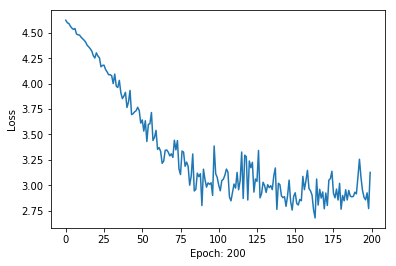

[118.47253441810608 (250 5%) 2.8677]
Wh orourcouin[  pe nous her am wedoard a sowar hinghed  k langhhe  9e erur hon romey ge D0y heres { a  

[141.76237726211548 (300 6%) 2.9970]
ren s  M k ane  aiedo ind (Pll ouse 8J:  

[165.40821623802185 (350 7%) 2.9410]
Whe ;z woiman hand learende le w 6asr REa)e had  L' sanlbose ide g o e oARhe as 6Le
  inonghe% ser hi 

[188.4607183933258 (400 8%) 2.7701]
Whinea! ' ling sheg (} ca2f+mind lend aroderds@s ooCild ancano ads  a|he  w s /o<e ine 6$as maren i$p 



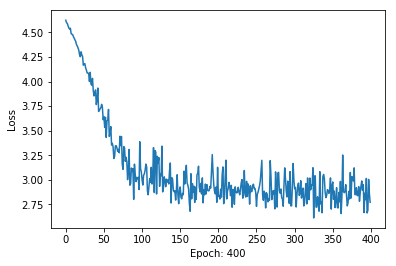

[212.8621051311493 (450 9%) 2.9939]
Whele ind ando(~as >3dipe he alis2#doungal s R  s ashin id loresand agend 	as ang a|o zan  3Shelu : an 

[236.96047568321228 (500 10%) 2.8186]
Whe al is } nd ars bais n heme o~g prsFe as wearind . nghen wad ? a ) ean u: anghore w nd s inel 's V  

[261.2993347644806 (550 11%) 2.8733]
Whin o 8ou&n' resin ine in irend  ' er con ')I a)es  imo! l)end he inghalsJ as , i&lid hid  indEn  nd  

[285.3094096183777 (600 12%) 2.7083]
\W	<les w wine an Z sur xs ond n cange wis@r hese s ald so shan in 



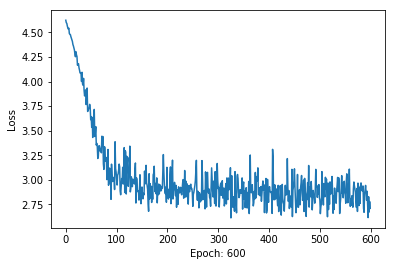

[309.8967795372009 (650 13%) 2.9110]
Whe  hes]9s |?Ael ]$grod s d s Ze )aleer pro*sd me we O@WoTher umun aq-ne cl  ~won win poro)e win wino 

[333.967351436615 (700 14%) 2.7481]
Wheru Rind   sanind rome l   hare gheand ses ce wand e is Pperedoround , are  lan and  cond d d wallor 

[358.20193362236023 (750 15%) 2.8168]
Whe
 wn I o / as  wowanors owale sin w a& asU&2: hacilere  he mel cind '  o a- The Z ainge s(awar cle  

[381.2689805030823 (800 16%) 2.8144]
Whe? her 'Thang ar hilll? ; s wang s ond shing asaOghe han7 wiWhas he ang  end weg om in I ha p  Y  g  



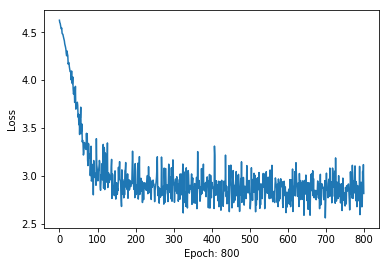

[404.2870395183563 (850 17%) 3.0339]
Whe imanellineneler 
 d ce unos ars a\idimas hend  be /aiherd  wene Minvee par  creerouRowas4ke s nd   

[427.8521807193756 (900 18%) 2.9935]
Whim il hesom s Low  was unored ch hened ace as we g mer } han ond <4 wnd 2MoraZfroresirg }2ornd  whe  

[451.4610035419464 (950 19%) 3.0364]
Whedrer nom he "
 h=quThand  ie i\0Sand g  ser owpal s wleem  6Sasereim d uiUe Lonoree ms UYow+qu  how 

[475.26922035217285 (1000 20%) 2.7416]
Whidas his murooun l oige o ^e Orere ll . aisDin andsouserisse Derer =risowo urns ed Lo)6med sinoresi< 



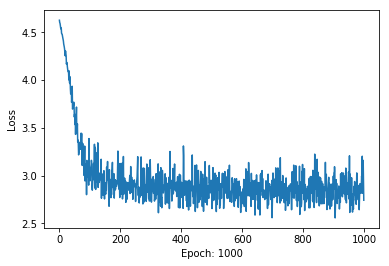

[499.1915485858917 (1050 21%) 2.7263]
Wh w he hes+, m `he   ol8u? s nd sul ald han 7 wad id Araped ichereas alo ^ous /\- $ine irour 	d o6r9 

[522.7447645664215 (1100 22%) 3.0284]
Whid acard  hesea, ine 
s rowinqus ' is ze wirn qund Xg d  1erse he h oo/urda% U-areto+5 ven Der hehen 

[546.1125311851501 (1150 23%) 2.7104]
Wh Gire _bindi1. leresher4Cele ghe s we ngh ngd urdanousererd Woureronan  joulee verd erorure p old Fo 

[569.3423309326172 (1200 24%) 2.8542]
Whe quc wilorllager a scor   s oo ind  ilrend ar }illid ar sume Deshendsoind <n d  arey " p llllomeand 



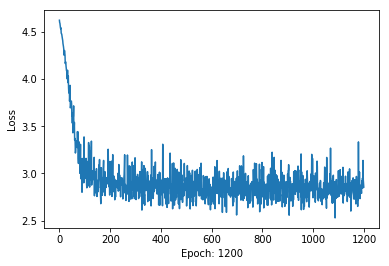

[593.1398522853851 (1250 25%) 2.6835]
as ; w win han o  ou as' |e arecalou1@; ld h  celd  ore sa(he . 

[616.5145719051361 (1300 26%) 2.7973]
Whid |%e wrdou she ' pad- he win ane ; nouieromen prgann $Ve hredland ano a  Sheas a<r Me ge easoainod 

[639.7962522506714 (1350 27%) 3.1094]
Whed %ncor-a$rs d hemanges ndelur Nadssind Kn ase indeagand }e nd se hinin wand " wede  salllunde rou 

[662.945226430893 (1400 28%) 2.7714]
Whano hale woulingll Xme 'Rinch&9rl *Eo Sag  angil g il in urOre d orse g he -Ard wag ju  he 	n
 _`=M 



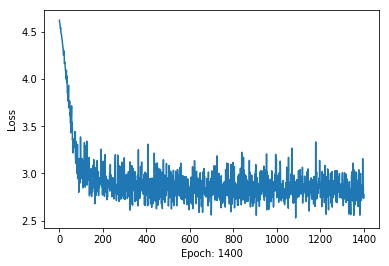

[686.9782848358154 (1450 28%) 2.8124]
Whangarpa sor Yo an orad ar Zouer Komas Basourd  enden9l]f Ele 
 s oonedom '  ar su7   hed we X@`e 9r3 

[710.1973829269409 (1500 30%) 2.7837]
~$nNe cagre ne )er  he  ca 

[733.201895236969 (1550 31%) 3.0024]
Whe nges ches   4$The o ainghesore a-hereas(thourill lousme Le  dinolidods cacedoul as 
e@s ug ad ]Shi 

[756.0279467105865 (1600 32%) 2.9737]
Whe po acesOre in wand anI 8Meporepan>Und `isowarou Znde ws Vue oore o' n s1es ande in s  8ie he ! n n 



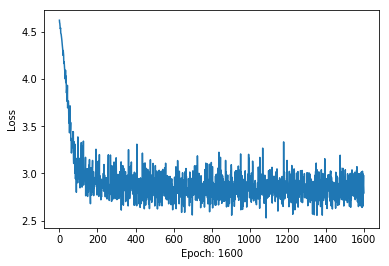

[779.5027320384979 (1650 33%) 2.8502]
Whu   on qul a gound and imallored Vasar on an [ ce od ' e amico se ils Borerere9sQ *f cheands@, ond  

[803.0177521705627 (1700 34%) 2.7903]
Cors  acl"paroom Vared he an he w 



KeyboardInterrupt: ignored

In [8]:
import time
from matplotlib import pyplot as plt

def train(n_layers, lr):
  hidden_size = n_characters
  in_size = n_characters
  out_size = n_characters
  file_name = './text_files/lotr.txt'
  train_dataset = TextDataset(file_name=file_name)
  decoder = RNN(in_size, hidden_size, out_size, n_layers=n_layers).to(device)
  optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
  objective = nn.CrossEntropyLoss()

  losses = []
  optimizer.zero_grad()
  hidden = decoder.init_hidden()
  n_epochs = 5000
  print_every = 50
  plot_every = 200
  start = time.time()
  running_loss = 0
  for epoch in range(1, n_epochs + 1):
    running_loss = 0
    optimizer.zero_grad()
    input_string, target_string = train_dataset.random_training_set()
    for char, target_char in zip(input_string, target_string):
      char = char.to(device)
      hidden = hidden.to(device)
      out_char, hidden = decoder(char, hidden)
      running_loss += objective(out_char.squeeze(0).to(device), target_char.unsqueeze(0).to(device))
    loss = running_loss / len(target_string)
    losses.append(loss)
    running_loss.backward(retain_graph=True)
    optimizer.step()

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time.time() - start, epoch, epoch / n_epochs * 100, loss))
        print(evaluate(decoder, 'Wh', 100), '\n')

    if epoch % plot_every == 0:
#         losses.append(running_loss / plot_every)
        plt.plot(range(len(losses)), losses)
        plt.xlabel("Epoch: {}".format(epoch))
        plt.ylabel("Loss")
        plt.show()
#         running_loss = 0
         
train(1, .001)

---

## Part 3: Sample text and Training information

---

You can at this time, if you choose, also write out your train loop boilerplate that samples random sequences and trains your RNN. This will be helpful to have working before writing your own GRU class.

If you are finished training, or during training, and you want to sample from the network you may consider using the following function. If your RNN model is instantiated as `decoder`then this will probabilistically sample a sequence of length `predict_len`

**TODO:**
* Fill out the evaluate function to generate text frome a primed string

**DONE:**



In [0]:
sftmx = nn.Softmax(dim=0)

def evaluate(decoder, prime_str='A', predict_len=100, temperature=0.8):
  hidden = decoder.init_hidden()
  input_str = char_tensor(prime_str)
  
  for i in range(len(input_str) - 1):
    _, hidden = decoder(input_str[i].to(device), hidden.to(device))
    
  eval_input = input_str[-1]
  
  predicted = prime_str
  for char in range(predict_len):
    out, hidden = decoder(eval_input.to(device), hidden.to(device))
#     distribution = out.view(-1)
    distribution = out.view(-1)
    probs = distribution / temperature
    sftmx_probs = sftmx(probs)
    candidate = torch.multinomial(sftmx_probs, 1)[0]
    next_char = all_characters[candidate]
    eval_input = char_tensor(next_char)
    predicted += next_char
    
  return predicted
  

---

## Part 4: (Create a GRU cell, requirements above)

---



---

## Part 5: Run it and generate some text!

---

Assuming everything has gone well, you should be able to run the main function in the scaffold code, using either your custom GRU cell or the built in layer, and see output something like this. I trained on the “lotr.txt” dataset, using chunk_length=200, hidden_size=100 for 2000 epochs gave.

**TODO:** 
* Create some cool output

**DONE:**



In [0]:
train(1, .001)

In [0]:
for i in range(10):
  start_strings = [" Th", " wh", " he", " I ", " ca", " G", " lo", " ra"]
  start = random.randint(0,len(start_strings)-1)
  print(start_strings[start])
#   all_characters.index(string[c])
  print(evaluate(start_strings[start], 200), '\n')

---

## Part 6: Generate output on a different dataset

---

**TODO:**

* Choose a textual dataset. Here are some [text datasets](https://www.kaggle.com/datasets?tags=14104-text+data%2C13205-text+mining) from Kaggle 

* Generate some decent looking results and evaluate your model's performance (say what it did well / not so well)

**DONE:**

